#### Villagrana M. "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Midterm Project

## 1. Business Understanding

### Background: With all the movies already released,and the ones still planning on being released, there is no way to tell the success of a movie before it comes out without critics and what the data set calls "instincs". Our "job" is find ways we can predict the success of a movie before it comes out with various data points.

### What are the project's goals?

* To identify ways we can use various data points to predict the success of a movie before it comes out.

### If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect?

* There are many different variables to collect to predict the greatness of a movie. For example, the director, the title, the duration, the country it is from, what genre, the language it's in, and its budget to name a few.

### What variables are highly correlated to imdb score? In this project, you will use imdb_score to measure a movie’s success.

* num_voted_users, duration and num_critic_for_reviews have the highest correlation to imdb_score.

## 2. Data Understanding

In [400]:
# import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.formula.api as sm
#from statsmodels.formula.api import ols

In [401]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [402]:
# get the data

df = pd.read_csv("C:\Users\Michelle\Desktop\MIS 665\MidtermProject-IMDBMovies\movie_metadata.csv")
df.head(5)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Describe the data

In [403]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### Identify data quality issues

* The minimum for a movie is 7 minutes long which doesn't seem to be correct.

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

* There are a lot of missing values within this data set. The only ones not missing values are genres, movie_title, num_voted_users, cast_total_facebook_likes, movie_imdb_link, imdb_score, and movie_facebook_likes.

In [405]:
df.groupby('color').size()

color
 Black and White    209 
Color               4815
dtype: int64

In [406]:
df.groupby('genres').size()

genres
Action                                                             11
Action|Adventure                                                   11
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy             1 
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller    1 
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi              2 
Action|Adventure|Animation|Comedy|Family                           6 
Action|Adventure|Animation|Comedy|Family|Fantasy                   4 
Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi            2 
Action|Adventure|Animation|Comedy|Family|Sci-Fi                    3 
Action|Adventure|Animation|Comedy|Fantasy                          1 
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi                   1 
Action|Adventure|Animation|Comedy|Sci-Fi                           1 
Action|Adventure|Animation|Drama|Fantasy|Sci-Fi                    1 
Action|Adventure|Animation|Drama|Mystery|Sci-Fi|Thriller           1 
Action|Advent

In [407]:
df.groupby('language').size()

language
Aboriginal    2   
Arabic        5   
Aramaic       1   
Bosnian       1   
Cantonese     11  
Chinese       3   
Czech         1   
Danish        5   
Dari          2   
Dutch         4   
Dzongkha      1   
English       4704
Filipino      1   
French        73  
German        19  
Greek         1   
Hebrew        5   
Hindi         28  
Hungarian     1   
Icelandic     2   
Indonesian    2   
Italian       11  
Japanese      18  
Kannada       1   
Kazakh        1   
Korean        8   
Mandarin      26  
Maya          1   
Mongolian     1   
None          2   
Norwegian     4   
Panjabi       1   
Persian       4   
Polish        4   
Portuguese    8   
Romanian      2   
Russian       11  
Slovenian     1   
Spanish       40  
Swahili       1   
Swedish       5   
Tamil         1   
Telugu        1   
Thai          3   
Urdu          1   
Vietnamese    1   
Zulu          2   
dtype: int64

* There doesn't seem to be too much data quality issues in this data set.

### Identify data types

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### Identify value counts of a selective list of columns considered to be important to predict a movie’s success (imdb_score)

* num_voted_users, duration and num_critic_for_reviews have the highest correlation to imdb_score.

## 3. Data Preparation

### Perform all necessary data cleaning and transformation activities

In [409]:
# remove unnecessary columns
df.drop(['gross', 'cast_total_facebook_likes', 'num_critic_for_reviews', 'num_voted_users', 'movie_facebook_likes'], axis = 1)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [411]:
# Use averages for columns that have less than 43 missing values and are ints or floats
# duration, actor_3_facebook_likes, actor_1_facebook_likes, facenumber_in_poster, num_user_for_reviews, and actor_2_facebook_likes
# Find averages for those columns
print df['duration'].describe()
print df['actor_3_facebook_likes'].describe()
print df['actor_1_facebook_likes'].describe()
print df['facenumber_in_poster'].describe()
print df['num_user_for_reviews'].describe()
print df['actor_2_facebook_likes'].describe()

count    5028.000000
mean     107.201074 
std      25.197441  
min      7.000000   
25%      93.000000  
50%      103.000000 
75%      118.000000 
max      511.000000 
Name: duration, dtype: float64
count    5020.000000 
mean     645.009761  
std      1665.041728 
min      0.000000    
25%      133.000000  
50%      371.500000  
75%      636.000000  
max      23000.000000
Name: actor_3_facebook_likes, dtype: float64
count    5036.000000  
mean     6560.047061  
std      15020.759120 
min      0.000000     
25%      614.000000   
50%      988.000000   
75%      11000.000000 
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64
count    5030.000000
mean     1.371173   
std      2.013576   
min      0.000000   
25%      0.000000   
50%      1.000000   
75%      2.000000   
max      43.000000  
Name: facenumber_in_poster, dtype: float64
count    5022.000000
mean     272.770808 
std      377.982886 
min      1.000000   
25%      65.000000  
50%      156.000000 
75%      326.0

In [412]:
df = df.fillna({'duration': 107.20})
df = df.fillna({'actor_3_facebook_likes': 645.00})
df = df.fillna({'actor_1_facebook_likes': 6560.04})
df = df.fillna({'facenumber_in_poster': 1.371173})
df = df.fillna({'num_user_for_reviews': 272.770808})
df = df.fillna({'actor_2_facebook_likes': 1651.754473})

df.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     0  
director_facebook_likes      104
actor_3_facebook_likes       0  
actor_2_name                 13 
actor_1_facebook_likes       0  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         0  
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         0  
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       0  
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

In [413]:
# drop remaining null values
df = df.dropna()
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [414]:
df.groupby('facenumber_in_poster').size()

facenumber_in_poster
0.000000     1582
1.000000     955 
1.371173     5   
2.000000     533 
3.000000     294 
4.000000     163 
5.000000     76  
6.000000     57  
7.000000     30  
8.000000     32  
9.000000     11  
10.000000    6   
11.000000    5   
12.000000    3   
13.000000    1   
14.000000    1   
15.000000    4   
19.000000    1   
31.000000    1   
43.000000    1   
dtype: int64

In [415]:
color_dummies = pd.get_dummies(df['color'], prefix='colour')
df = df.join(color_dummies)

rating_dummies = pd.get_dummies(df['content_rating'], prefix='rating')
df = df.join(rating_dummies)

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,colour_ Black and White,colour_Color,rating_Approved,rating_G,rating_GP,rating_M,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,rating_Unrated,rating_X
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [416]:
df2 = df.drop(['color', 'content_rating', 'facenumber_in_poster'], axis = 1)
df2.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,colour_ Black and White,colour_Color,rating_Approved,rating_G,rating_GP,rating_M,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,rating_Unrated,rating_X
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,1.78,33000,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,2.35,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,245000000.0,2015.0,393.0,6.8,2.35,85000,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,English,USA,263700000.0,2012.0,632.0,6.6,2.35,24000,0,1,0,0,0,0,0,0,0,1,0,0,0,0


## 4. Business Intelligence and 5. Correlation Analysis

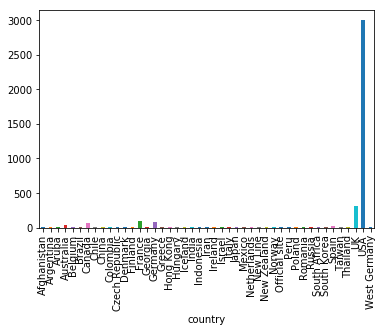

In [417]:
df2.groupby(['country']).size().plot(kind='bar')

In [418]:
df2.groupby('country')['imdb_score'].mean().sort_values(ascending=False)

country
West Germany      8.400000
Israel            8.000000
Brazil            7.760000
Iran              7.725000
Argentina         7.600000
Indonesia         7.600000
Netherlands       7.566667
Colombia          7.500000
New Zealand       7.481818
South Africa      7.433333
Afghanistan       7.400000
Italy             7.345455
Denmark           7.287500
Mexico            7.266667
India             7.220000
Finland           7.200000
China             7.192308
Taiwan            7.150000
Norway            7.150000
Belgium           7.100000
Spain             7.052381
Ireland           6.985714
Czech Republic    6.966667
Chile             6.900000
Iceland           6.900000
Japan             6.893333
Hong Kong         6.884615
UK                6.856918
France            6.774257
Greece            6.700000
South Korea       6.587500
Russia            6.466667
Hungary           6.450000
Australia         6.433333
Romania           6.400000
Thailand          6.400000
USA               6.

In [419]:
df2.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,colour_ Black and White,colour_Color,rating_Approved,rating_G,rating_GP,rating_M,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,rating_Unrated,rating_X
num_critic_for_reviews,1.000000,0.230883,0.174390,0.252095,0.165361,0.465971,0.593640,0.235755,0.564620,0.105057,0.419793,0.252222,0.348503,0.179811,0.706186,-0.000531,0.000531,-0.030470,-0.060075,-0.006265,-0.005784,-0.001026,-0.017589,-0.111935,0.107685,-0.017708,0.012536,-0.052700,0.001207
duration,0.230883,1.000000,0.180260,0.125752,0.083567,0.247904,0.341633,0.120127,0.352920,0.068494,-0.129651,0.128713,0.366935,0.153291,0.219370,0.047960,-0.047960,0.048880,-0.080721,0.007004,0.016014,-0.012818,-0.009802,-0.099663,0.064805,-0.009060,0.035271,-0.005212,-0.044353
director_facebook_likes,0.174390,0.180260,1.000000,0.117454,0.089735,0.137815,0.298971,0.118652,0.216792,0.018131,-0.044997,0.116154,0.192260,0.037386,0.160212,0.059009,-0.059009,-0.015331,-0.031612,-0.003853,-0.005525,-0.007927,-0.014807,0.000473,0.005840,-0.006887,0.013794,-0.017429,-0.011749
actor_3_facebook_likes,0.252095,0.125752,0.117454,1.000000,0.252487,0.299276,0.267388,0.489849,0.205182,0.040005,0.117094,0.553785,0.065649,0.046311,0.269434,-0.021572,0.021572,-0.019073,-0.029279,-0.005134,-0.005476,-0.009373,-0.030689,0.004764,0.097367,-0.009297,-0.072351,-0.024969,-0.014737
actor_1_facebook_likes,0.165361,0.083567,0.089735,0.252487,1.000000,0.143532,0.179298,0.944823,0.121799,0.016434,0.095567,0.391266,0.093725,0.056783,0.128876,-0.025181,0.025181,-0.027341,-0.040001,-0.007887,-0.010445,-0.006935,-0.038784,-0.012754,0.056477,-0.013472,-0.014415,-0.035872,0.002099
gross,0.465971,0.247904,0.137815,0.299276,0.143532,1.000000,0.625965,0.234978,0.545520,0.099911,0.055711,0.252099,0.215583,0.064481,0.370712,-0.043286,0.043286,-0.007427,0.074558,-0.002060,0.003233,-0.027380,-0.067185,0.147220,0.171068,-0.016733,-0.265020,-0.050819,-0.024963
num_voted_users,0.593640,0.341633,0.298971,0.267388,0.179298,0.625965,1.000000,0.248760,0.779307,0.066360,0.023831,0.244344,0.482926,0.084813,0.519756,0.035015,-0.035015,-0.007468,0.001571,-0.003390,0.000020,-0.016580,-0.047760,-0.056552,0.067531,-0.001118,-0.005053,-0.039937,-0.016239
cast_total_facebook_likes,0.235755,0.120127,0.118652,0.489849,0.944823,0.234978,0.248760,1.000000,0.178515,0.028711,0.126348,0.643049,0.106960,0.068792,0.203658,-0.029417,0.029417,-0.031928,-0.047279,-0.008886,-0.011526,-0.011140,-0.046725,-0.011960,0.078688,-0.015379,-0.029697,-0.041726,-0.005652
num_user_for_reviews,0.564620,0.352920,0.216792,0.205182,0.121799,0.545520,0.779307,0.178515,1.000000,0.070667,0.019660,0.186778,0.325672,0.098109,0.372314,0.069818,-0.069818,-0.012642,-0.042097,-0.002418,0.002440,-0.010900,-0.048750,-0.093173,0.101594,-0.007258,0.000470,-0.039129,0.002224
budget,0.105057,0.068494,0.018131,0.040005,0.016434,0.099911,0.066360,0.028711,0.070667,1.000000,0.047217,0.035698,0.029459,0.025408,0.053219,-0.015137,0.015137,-0.012000,0.003326,-0.002821,-0.004061,-0.006560,-0.017174,0.014712,0.033302,-0.005498,-0.034521,-0.012668,-0.009772


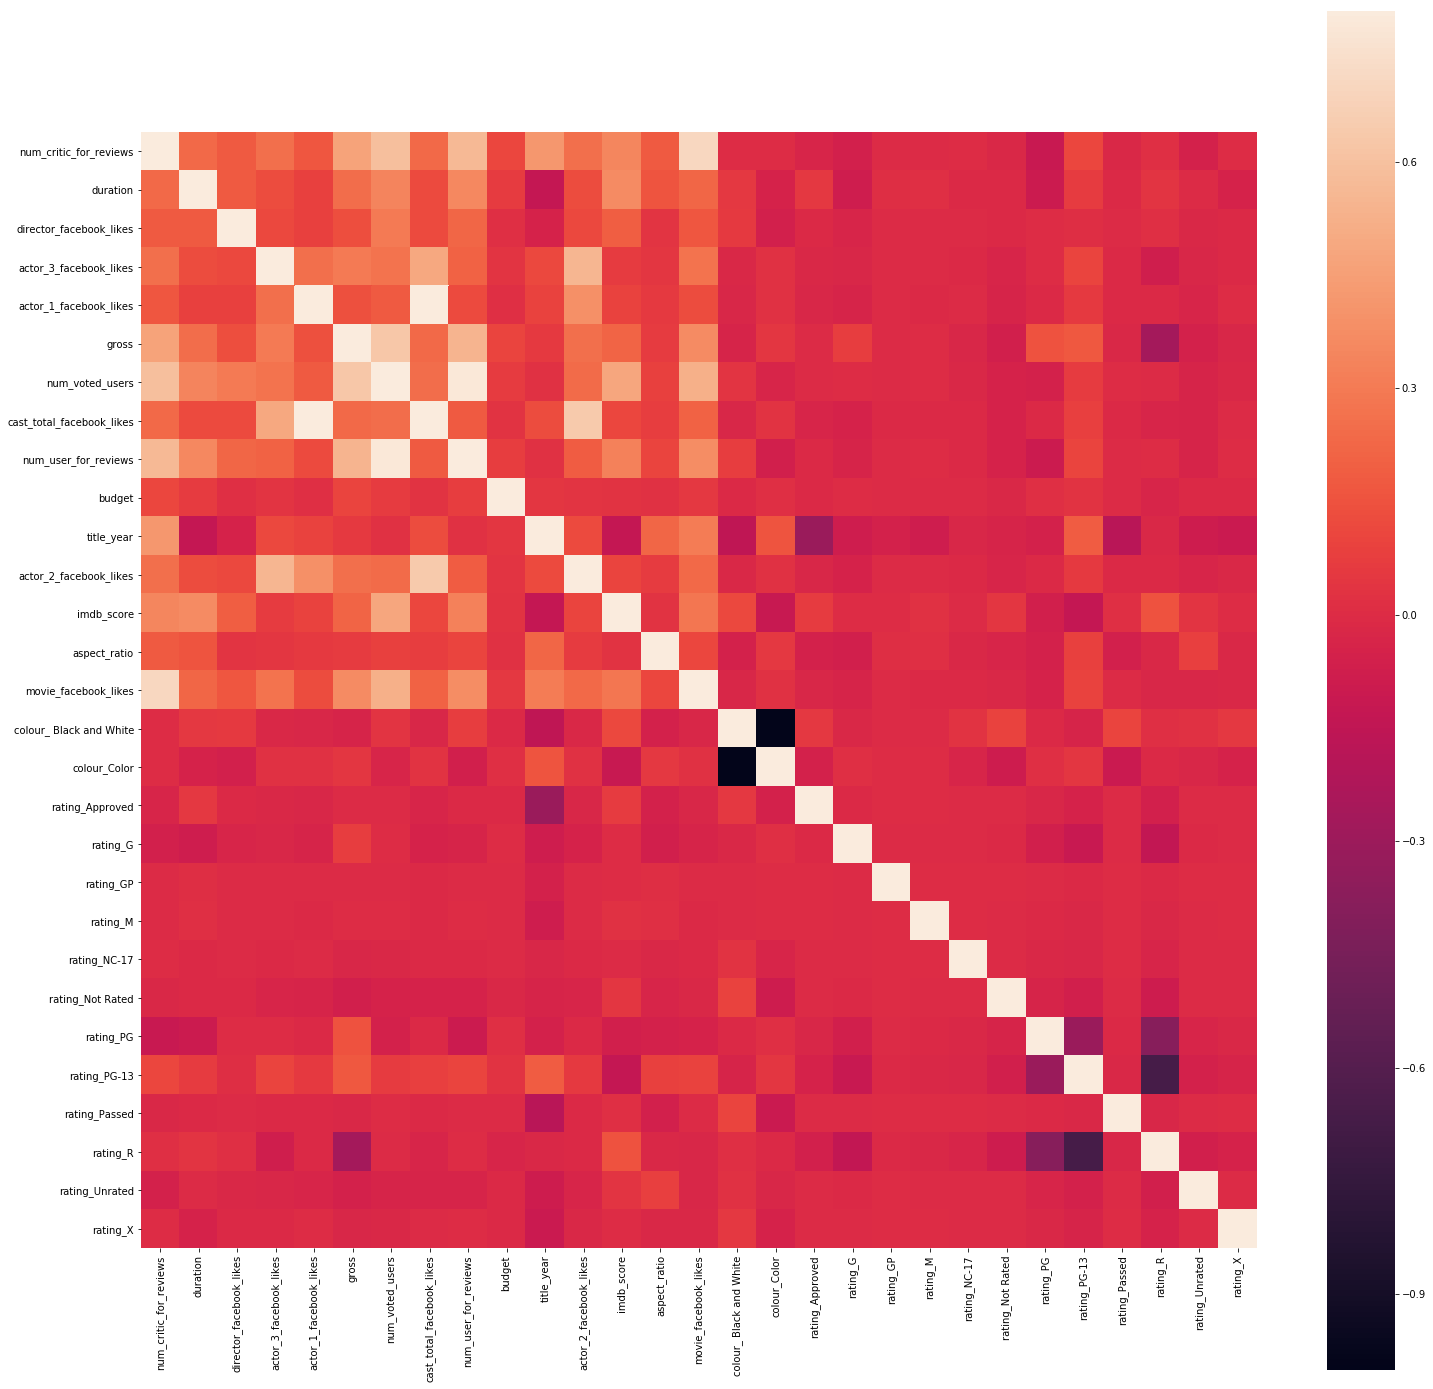

In [420]:
plt.figure(figsize=(25,25))
sns.heatmap(df2.corr(), vmax=.8, square=True)

* There is high correlation between imbd score and num_voted_users, num_user_for_reviews, movie_facebook_likes, num_critic_for_reviews, and duration.

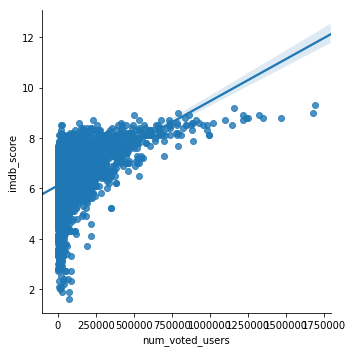

In [421]:
sns.lmplot("num_voted_users", "imdb_score", df2, x_jitter=.05)

* With this graph, you can see that the correlation between imdb score and the number of people who voted for the movie becomes flat the more people who voted increases. It has a s decent correlation but I don't think it can help predict how will a movie will do.

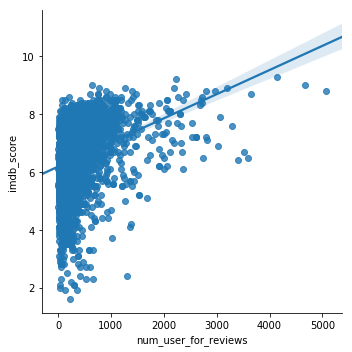

In [422]:
sns.lmplot("num_user_for_reviews", "imdb_score", df2, x_jitter=.05)

* While the number of users who gave a review increases, the score of a movie increases. In terms of predicting how a movie will do before coming out, I don't think it will help much. Otherwise, it makes sense that the more reviews it has, the better of a chance the movie has of doing well.

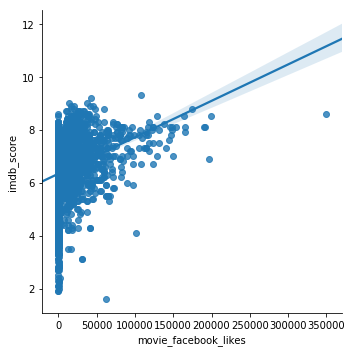

In [423]:
sns.lmplot("movie_facebook_likes", "imdb_score", df2, x_jitter=.15)

* This graph is essentially a giant blob. I am interpreting this as there is no clear pattern as to how movie facebook likes increases imdb score. I think this correlation is created by the few outliers.

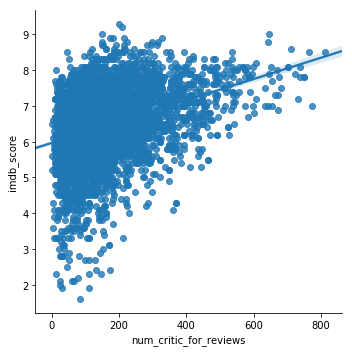

In [424]:
sns.lmplot("num_critic_for_reviews", "imdb_score", df2, x_jitter=.15)

* I think this grapth is very similar to the last in terms of it being driven by the extreme movies. I think this helps with predicting success because it provides reviews for the movie.

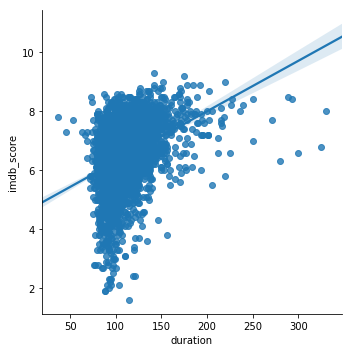

In [425]:
sns.lmplot("duration", "imdb_score", df2, x_jitter=.05)

* With this graph, it interesting to note that if a movie is an hour long, it has a chance of having any kind of rating. It's also interesting to note that the longer a movie lasts, the higher chances of it having a better score increases.

## 6. Storytelling

Based on the graphs above, I'd say there is correlation between higher imdb scores and things like higher reviews and higher likes for the movies. This can be seen in the graphs from above.

From the start, we cleaned up the data set to get rid of any kind of columns that was irrelevent to determing imdb score. From there, we filled in the numerical null values with averages. The remaining null values were dropped.

These are the columns and data points to take note of that can help determine the imdb scores:
* num_voted_users
* num_user_for_reviews
* movie_facebook_likes 
* num_critic_for_reviews
* duration

A lot of the columns that contribute to a higher score are reviews and likes from social media. This can help movies out before they released because they are the best bet of knowing what other people think before it comes out officially.

## References:
* https://nycdatascience.com/blog/student-works/machine-learning/movie-rating-prediction/
* https://seaborn.pydata.org/generated/seaborn.lmplot.html

# Building Regression

Highest correlated variables

num_voted_users
num_user_for_reviews
movie_facebook_likes
num_critic_for_reviews
duration

In [426]:
# get the unclean data 

Final = pd.read_csv("C:\Users\Michelle\Desktop\MIS 665\MidtermProject-IMDBMovies\movie_metadata.csv")
Final.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [427]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### Clean the data

In [428]:
Final = df.drop(["color", "director_name", "actor_2_name", "genres", "actor_1_name",
                 "movie_title", "actor_3_name", "facenumber_in_poster", "language", "country", 
                 "content_rating", "plot_keywords", "movie_imdb_link", "title_year", "aspect_ratio", "colour_ Black and White",
                 "colour_Color", "rating_Approved", "rating_G", "rating_GP", "rating_M", "rating_NC-17", "rating_Not Rated", "rating_PG",
                 "rating_PG-13", "rating_Passed", "rating_R", "rating_Unrated", "rating_X" ], axis=1)
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 0 to 5042
Data columns (total 13 columns):
num_critic_for_reviews       3761 non-null float64
duration                     3761 non-null float64
director_facebook_likes      3761 non-null float64
actor_3_facebook_likes       3761 non-null float64
actor_1_facebook_likes       3761 non-null float64
gross                        3761 non-null float64
num_voted_users              3761 non-null int64
cast_total_facebook_likes    3761 non-null int64
num_user_for_reviews         3761 non-null float64
budget                       3761 non-null float64
actor_2_facebook_likes       3761 non-null float64
imdb_score                   3761 non-null float64
movie_facebook_likes         3761 non-null int64
dtypes: float64(10), int64(3)
memory usage: 571.4 KB


In [429]:
Final.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
num_user_for_reviews         0
budget                       0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [430]:
Final = Final.dropna()
Final.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
num_user_for_reviews         0
budget                       0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [431]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 0 to 5042
Data columns (total 13 columns):
num_critic_for_reviews       3761 non-null float64
duration                     3761 non-null float64
director_facebook_likes      3761 non-null float64
actor_3_facebook_likes       3761 non-null float64
actor_1_facebook_likes       3761 non-null float64
gross                        3761 non-null float64
num_voted_users              3761 non-null int64
cast_total_facebook_likes    3761 non-null int64
num_user_for_reviews         3761 non-null float64
budget                       3761 non-null float64
actor_2_facebook_likes       3761 non-null float64
imdb_score                   3761 non-null float64
movie_facebook_likes         3761 non-null int64
dtypes: float64(10), int64(3)
memory usage: 411.4 KB


### Begin Regression

In [432]:
#### separate target from training features

In [433]:
#first regression model
# set imdb_score as the Y value
#y = Final["imdb_score"]
# set all the other variables as X
#X = Final[['num_voted_users', 'num_user_for_reviews', 'movie_facebook_likes', 'num_critic_for_reviews', 'duration']]
#X.head()

In [434]:
#first regression model
# set imdb_score as the Y value
y = Final["imdb_score"]
# set all the other variables as X
X = Final.drop(['imdb_score'], axis=1)
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,24000


In [435]:
# Build a linear regression model
lr = lm.LinearRegression()
lr.fit(X, y)
# Now, predict points with your trained model
y_lr = lr.predict(X)

In [436]:
#report coefficients sum of squares sof error (SSE), variance score (or R-Square)
print 'Coefficients: \n', lr.coef_
#y-intercept
print "y-intercept ", lr.intercept_

Coefficients: 
[ 1.58688986e-03  1.18496017e-02  7.71266124e-06  7.39951167e-05
  7.72822087e-05 -1.78255108e-09  4.02453500e-06 -7.68726984e-05
 -5.59576919e-04 -5.60964885e-11  7.92597171e-05 -3.02926728e-06]
y-intercept  4.843641583227892


In [437]:
#coefficients in a nice dataframe
pd.DataFrame(zip(X.columns, np.transpose(lr.coef_)))

,0,1
0,num_critic_for_reviews,1.586890e-03
1,duration,1.184960e-02
2,director_facebook_likes,7.712661e-06
3,actor_3_facebook_likes,7.399512e-05
4,actor_1_facebook_likes,7.728221e-05
5,gross,-1.782551e-09
6,num_voted_users,4.024535e-06
7,cast_total_facebook_likes,-7.687270e-05
8,num_user_for_reviews,-5.595769e-04
9,budget,-5.609649e-11


Poor models ):

## Feature Selection

In [438]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0526, 'movie_facebook_likes'), (0.0599, 'actor_2_facebook_likes'), (0.06, 'actor_1_facebook_likes'), (0.0611, 'cast_total_facebook_likes'), (0.0623, 'actor_3_facebook_likes'), (0.0668, 'director_facebook_likes'), (0.0847, 'num_critic_for_reviews'), (0.0848, 'num_user_for_reviews'), (0.0913, 'budget'), (0.0961, 'gross'), (0.1078, 'duration'), (0.1727, 'num_voted_users')]


In [439]:
#Predict class probabilities for X
clf.predict_proba(X_test)

array([[0.  , 0.25, 0.75, 0.  ],
       [0.  , 0.1 , 0.9 , 0.  ],
       [0.  , 0.2 , 0.8 , 0.  ],
       ...,
       [0.1 , 0.65, 0.25, 0.  ],
       [0.  , 0.  , 0.35, 0.65],
       [0.  , 0.15, 0.85, 0.  ]])

### Lasso

In [440]:
#Fit the model
model1 = linear_model.Lasso(alpha=1)
model1.fit(X,y)
model1_y = model1.predict(X)

print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.7503845856077704
variance or r-squared:  0.3269308859248483


C:\Users\Michelle\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [441]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.009'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000')]

## f_regression

In [442]:
# select only 2 X variables
X_new = SelectKBest(f_regression, k = 5).fit_transform(X, y)
X_new

array([[7.23000e+02, 1.78000e+02, 8.86204e+05, 3.05400e+03, 3.30000e+04],
       [3.02000e+02, 1.69000e+02, 4.71220e+05, 1.23800e+03, 0.00000e+00],
       [6.02000e+02, 1.48000e+02, 2.75868e+05, 9.94000e+02, 8.50000e+04],
       ...,
       [1.43000e+02, 7.70000e+01, 7.26390e+04, 3.71000e+02, 1.90000e+04],
       [5.60000e+01, 8.10000e+01, 5.20550e+04, 1.30000e+02, 0.00000e+00],
       [4.30000e+01, 9.00000e+01, 4.28500e+03, 8.40000e+01, 4.56000e+02]])

In [443]:
#Fit the model
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.7764569997295575
variance or r-squared:  0.303544828946428


## RFE

In [444]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Features sortted by their rank: "
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns))

Features sortted by their rank: 
[(1.0, 'duration'), (1.0, 'num_critic_for_reviews'), (2.0, 'num_user_for_reviews'), (3.0, 'actor_3_facebook_likes'), (4.0, 'actor_2_facebook_likes'), (5.0, 'actor_1_facebook_likes'), (6.0, 'cast_total_facebook_likes'), (7.0, 'director_facebook_likes'), (8.0, 'num_voted_users'), (9.0, 'movie_facebook_likes'), (10.0, 'gross'), (11.0, 'budget')]


# Classification

In [445]:
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [446]:
Final['category'] =  1
Final.loc[(Final['imdb_score'] > 4) & (Final['imdb_score'] <= 6), 'category'] = 2
Final.loc[(Final['imdb_score'] > 6) & (Final['imdb_score'] <= 8), 'category'] = 3
Final.loc[Final['imdb_score'] > 8, 'category'] = 4
Final.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,7.9,33000,3
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,7.1,0,3
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,6.8,85000,3
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,8.5,164000,4
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,6.6,24000,3


In [447]:
y = Final['category']
X = Final.drop(['category', 'imdb_score'], axis=1)

### Decision Tree

In [448]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [449]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"


# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.6687333923826395
--------------------------------------------------------
[[  0  13   9   0]
 [ 10 161 146   0]
 [ 12 146 564  20]
 [  0   0  18  30]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        22
          2       0.50      0.51      0.51       317
          3       0.77      0.76      0.76       742
          4       0.60      0.62      0.61        48

avg / total       0.67      0.67      0.67      1129

--------------------------------------------------------


### Knn

In [450]:
y = Final['category']
X = Final.drop(['category', 'imdb_score'], axis=1)

In [451]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Text(0,0.5,'accuracy')

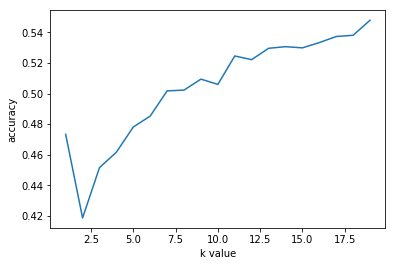

In [452]:
# search for an optimal value of K
k_range = range(1, 20)
scores = []
for k in k_range:
    # initialize KNeighborsClassifier() and train a KNN Model
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))
    
# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel("k value")
plt.ylabel("accuracy")

In [453]:
# what is optimal k value?
print scores

[0.47327651620522015, 0.41856928867825677, 0.451494768458404, 0.461602806946465, 0.47808389092385906, 0.4852528316580537, 0.5017170709571814, 0.5022426328524684, 0.5094214989311403, 0.5059724502463874, 0.5245770287198452, 0.5221783906317892, 0.5296083767373181, 0.5306721990898937, 0.5298933668731779, 0.5333451736951973, 0.5373268577807441, 0.5381240396839682, 0.5479681054975215]


In [454]:
# evaluate the model by splitting into train and test sets and develop knn model (name it as knn) . use optimal k value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# model evaluation without validation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"

0.6687333923826395
--------------------------------------------------------
[[  0  13   9   0]
 [ 10 161 146   0]
 [ 12 146 564  20]
 [  0   0  18  30]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        22
          2       0.50      0.51      0.51       317
          3       0.77      0.76      0.76       742
          4       0.60      0.62      0.61        48

avg / total       0.67      0.67      0.67      1129

--------------------------------------------------------


### Logistic Regression

In [455]:
y = Final['category']
X = Final.drop(['category', 'imdb_score'], axis=1)

In [456]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [457]:
#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"

0.6395039858281665
--------------------------------------------------------
[[  0   0  22   0]
 [  0   7 310   0]
 [  0   4 690  48]
 [  0   0  23  25]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        22
          2       0.64      0.02      0.04       317
          3       0.66      0.93      0.77       742
          4       0.34      0.52      0.41        48

avg / total       0.63      0.64      0.54      1129

--------------------------------------------------------


C:\Users\Michelle\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [458]:
# generate class probabilities
probs = lr.predict_proba(X_test)
print probs
#1st column: probability of receiving great score
#2nd column: probabiility of having ok score
#3rd column: probability of having not so good score
#4th column: probability of having a bad score

[[3.25137350e-06 1.64084292e-01 8.31714596e-01 4.19786110e-03]
 [6.14381066e-09 9.24762317e-03 8.22998440e-01 1.67753931e-01]
 [2.47960695e-05 3.44569687e-01 6.46848704e-01 8.55681222e-03]
 ...
 [1.55889136e-01 3.24551192e-01 3.46517584e-01 1.73042088e-01]
 [2.19068404e-12 3.47943443e-04 5.97175474e-01 4.02476583e-01]
 [3.54529578e-04 3.70544290e-01 6.23057647e-01 6.04353377e-03]]


### Random Forest Classifier

In [459]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7360496014171833

In [460]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.7360496014171833
[[  0  18   4   0]
 [  0 161 156   0]
 [  0  91 648   3]
 [  0   0  26  22]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        22
          2       0.60      0.51      0.55       317
          3       0.78      0.87      0.82       742
          4       0.88      0.46      0.60        48

avg / total       0.72      0.74      0.72      1129



C:\Users\Michelle\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Clustering

In [461]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [462]:
Final.var()

num_critic_for_reviews       1.529754e+04
duration                     5.137053e+02
director_facebook_likes      9.401964e+06
actor_3_facebook_likes       3.583695e+06
actor_1_facebook_likes       2.405759e+08
gross                        4.955835e+15
num_voted_users              2.316597e+10
cast_total_facebook_likes    3.652571e+08
num_user_for_reviews         1.692030e+05
budget                       5.102079e+16
actor_2_facebook_likes       2.063182e+07
imdb_score                   1.115167e+00
movie_facebook_likes         4.667243e+08
category                     3.384894e-01
dtype: float64

In [463]:
df_norm = (Final- Final.mean()) / (Final.max() - Final.min())
df_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,category
0,0.684946,0.231171,-0.035057,0.003660,-0.010538,0.930718,0.461816,-0.010177,0.537384,0.015614,-0.007911,0.186352,0.067616,0.095896
1,0.165834,0.200454,-0.010578,0.009964,0.050400,0.337558,0.216216,0.056085,0.178207,0.020772,0.021753,0.082456,-0.026940,0.095896
2,0.535747,0.128782,-0.035057,-0.026514,0.005087,0.193798,0.100601,0.000278,0.129948,0.016269,-0.011874,0.043495,0.216613,0.095896
3,0.795920,0.183389,0.921465,0.966486,0.030087,0.519971,0.614587,0.145024,0.467566,0.016678,0.153140,0.264274,0.442974,0.429230
5,0.363121,0.074174,-0.014405,-0.010471,-0.011100,0.026784,0.062922,-0.014686,0.079315,0.017800,-0.010130,0.017521,0.041828,0.095896


In [464]:
# clustering analysis using k-means

k_means= KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [465]:
# cluster labels

k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [466]:
# find out cluster centers

k_means.cluster_centers_

array([[ 0.02619572,  0.0138075 ,  0.01071178,  0.00191417,  0.00103911,
         0.00888074,  0.01675046,  0.00142971,  0.01037689,  0.00027132,
         0.00173628,  0.07046757,  0.00697328,  0.1160444 ],
       [-0.05969974, -0.03146714, -0.02441202, -0.00436238, -0.00236811,
        -0.0202391 , -0.03817412, -0.0032583 , -0.02364882, -0.00061834,
        -0.00395695, -0.16059479, -0.01589203, -0.26446388]])

In [467]:
# convert cluster lables to dataframe

cluster_df = pd.DataFrame(k_means.labels_, columns = ['cluster'])
cluster_df.head(15)

,cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [468]:
# join df_norm & df1

cluster_df2 = df_norm.join(cluster_df)
cluster_df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,category,cluster
0,0.684946,0.231171,-0.035057,0.003660,-0.010538,0.930718,0.461816,-0.010177,0.537384,0.015614,-0.007911,0.186352,0.067616,0.095896,0.0
1,0.165834,0.200454,-0.010578,0.009964,0.050400,0.337558,0.216216,0.056085,0.178207,0.020772,0.021753,0.082456,-0.026940,0.095896,0.0
2,0.535747,0.128782,-0.035057,-0.026514,0.005087,0.193798,0.100601,0.000278,0.129948,0.016269,-0.011874,0.043495,0.216613,0.095896,0.0
3,0.795920,0.183389,0.921465,0.966486,0.030087,0.519971,0.614587,0.145024,0.467566,0.016678,0.153140,0.264274,0.442974,0.429230,0.0
5,0.363121,0.074174,-0.014405,-0.010471,-0.011100,0.026784,0.062922,-0.014686,0.079315,0.017800,-0.010130,0.017521,0.041828,0.095896,0.0


In [469]:
cluster_df2.groupby(['cluster']).mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,category
cluster,,,,,,,,,,,,,,
0.0,0.012390,0.005614,0.001375,0.004487,0.000968,0.010265,0.005755,0.001631,0.004413,0.000620,0.001725,-0.001653,0.004014,-0.001120
1.0,-0.001884,0.005082,0.007907,0.000683,0.000614,0.004225,0.004129,0.000896,0.002411,-0.000096,0.001247,-0.010487,-0.002813,-0.013541


In [470]:
cluster_df2.groupby('cluster').size()

cluster
0.0    2223
1.0    996 
dtype: int64

### Hierarchical Clustering

In [471]:
X = (Final - Final.mean()) / (Final.max() - Final.min())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,category
0,0.684946,0.231171,-0.035057,0.003660,-0.010538,0.930718,0.461816,-0.010177,0.537384,0.015614,-0.007911,0.186352,0.067616,0.095896
1,0.165834,0.200454,-0.010578,0.009964,0.050400,0.337558,0.216216,0.056085,0.178207,0.020772,0.021753,0.082456,-0.026940,0.095896
2,0.535747,0.128782,-0.035057,-0.026514,0.005087,0.193798,0.100601,0.000278,0.129948,0.016269,-0.011874,0.043495,0.216613,0.095896
3,0.795920,0.183389,0.921465,0.966486,0.030087,0.519971,0.614587,0.145024,0.467566,0.016678,0.153140,0.264274,0.442974,0.429230
5,0.363121,0.074174,-0.014405,-0.010471,-0.011100,0.026784,0.062922,-0.014686,0.079315,0.017800,-0.010130,0.017521,0.041828,0.095896


In [472]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [473]:
#To add cluster label into the dataset as a column
hi_df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
hi_df1.head()

,cluster
0,0
1,0
2,0
3,3
4,0


In [474]:
hi_df2 = df.join(df1)
hi_df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,colour_ Black and White,colour_Color,rating_Approved,rating_G,rating_GP,rating_M,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,rating_Unrated,rating_X,cluster
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2.0


In [475]:
hi_df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,colour_ Black and White,colour_Color,rating_Approved,rating_G,rating_GP,rating_M,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_Passed,rating_R,rating_Unrated,rating_X
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,186.686120,112.219243,871.130915,965.231861,8458.634069,6.734125e+07,127628.022082,12771.070978,1.499008,377.847003,5.449183e+07,2003.971609,2240.358044,6.433754,2.145315,10542.351735,0.026814,0.973186,0.000000,0.023659,0.000000,0.001577,0.000000,0.003155,0.160883,0.405363,0.0,0.405363,0.000000,0.000000
1.0,155.548411,109.888396,789.036216,745.056171,7615.146341,4.522144e+07,98140.419808,11355.846268,1.465632,309.807834,4.399954e+07,2002.885440,2008.199557,6.405469,2.117539,8380.577975,0.025129,0.974871,0.002217,0.030303,0.000739,0.000000,0.000739,0.005174,0.146341,0.352550,0.0,0.454545,0.003695,0.003695
2.0,190.649385,113.999121,1028.882250,913.734622,9164.088752,7.203369e+07,129640.760984,13716.952548,1.328094,405.571178,5.900324e+07,2003.968366,2510.254833,6.468717,2.143023,12193.517575,0.030756,0.969244,0.003515,0.023726,0.000000,0.000879,0.000000,0.001757,0.182777,0.413884,0.0,0.372583,0.000879,0.000000
3.0,151.617021,112.042553,597.797872,707.553191,6399.000000,4.583842e+07,87039.723404,10334.351064,1.557140,279.021277,3.574426e+07,2003.446809,2160.478723,6.334043,2.088617,5345.297872,0.042553,0.957447,0.000000,0.000000,0.000000,0.000000,0.010638,0.000000,0.180851,0.287234,0.0,0.521277,0.000000,0.000000


In [476]:
hi_df2.groupby('cluster').size()

cluster
0.0    634 
1.0    1353
2.0    1138
3.0    94  
dtype: int64

# Storytelling

From the feature selection, we determined that 'budget', 'num_user_for_reviews', 'gross', 'duration', 'num_voted_users' were the most influential variables

RFE determines that 'director_facebook_likes', 'num_voted_users', 'movie_facebook_likes', 'gross', 'budget' are the most influential. There are similarities to the feature selection but not quite exact.

We dug deeper by doing some regression but quickly realized that the accuracy from these is not very good.

We moved onto classification models but all models did no better than 67% accuracy. Random forest classifier did the best with a 72%  accuracy.

### Recommendations / Suggestions

I would recommend to movie producers to have bigger budgets, and promote a lot to get "likes".

I would also recommend having a variable for music / score. I think that plays so much into a movie and can be just as important as voice actors/human actors.